<a href="https://colab.research.google.com/github/Susmitha-Katta/Emotion-based-recommendation-System/blob/main/Breast_cancer_prediction_Dataset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("Breast Cancer Prediction.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Checking for missing values

In [ ]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Data Visualization

Histogram

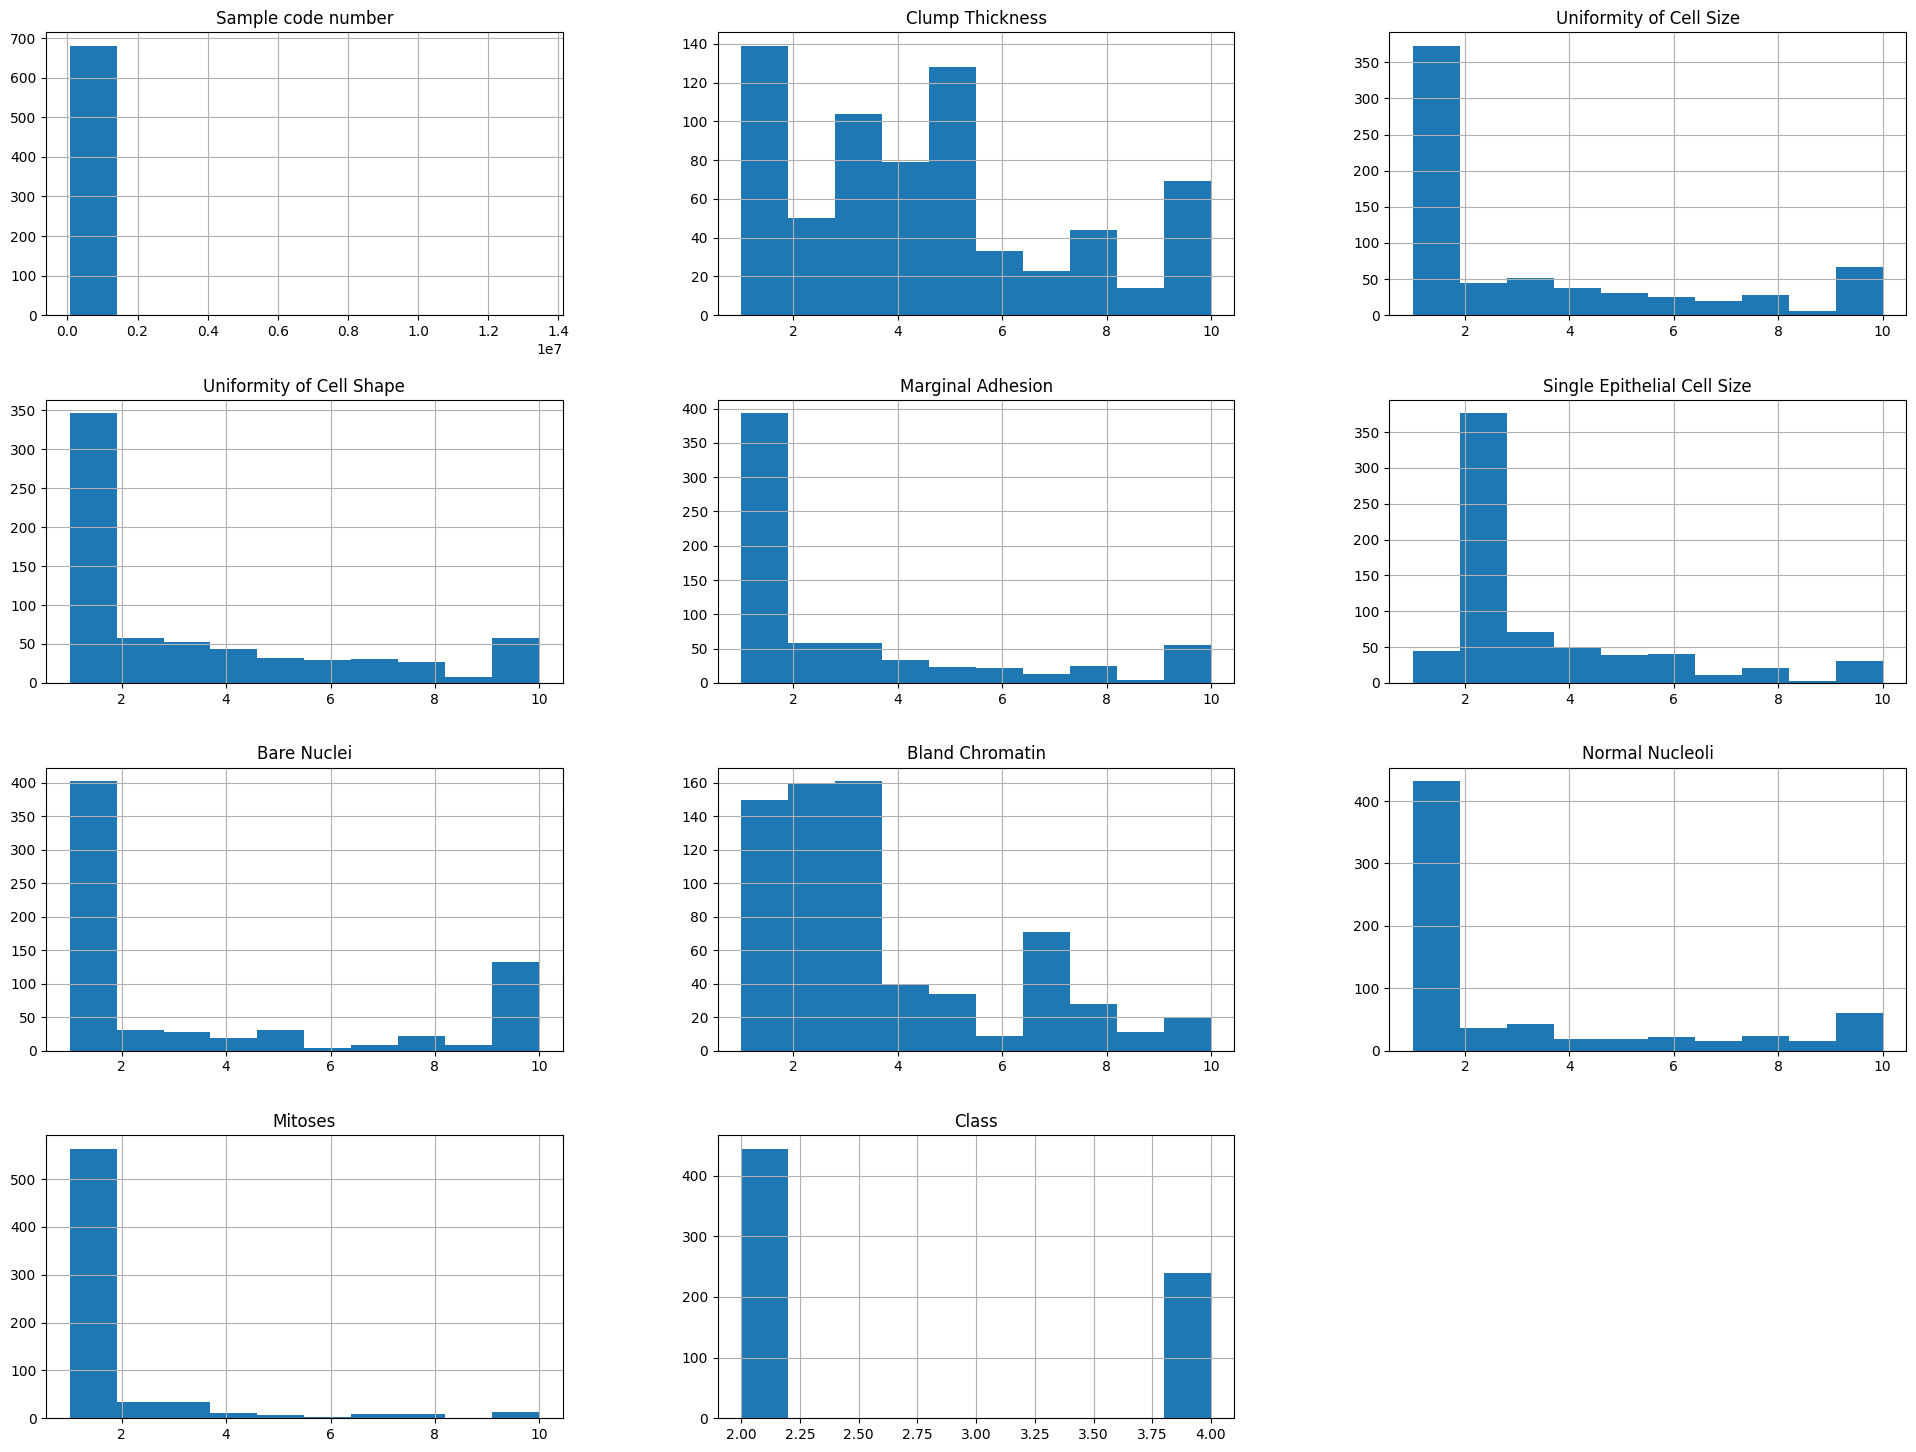

In [ ]:
df.hist(figsize=(24, 18))
plt.show()

Boxplot

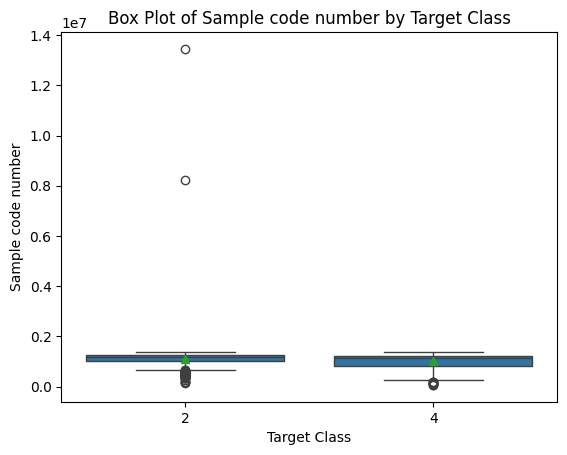

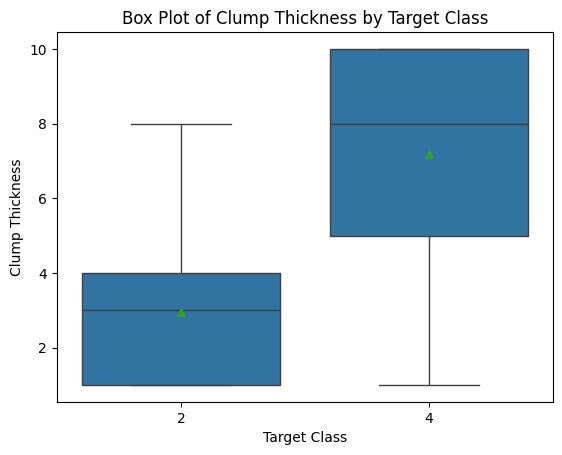

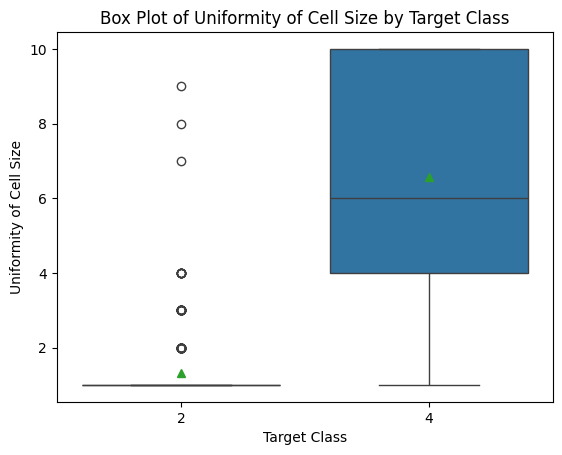

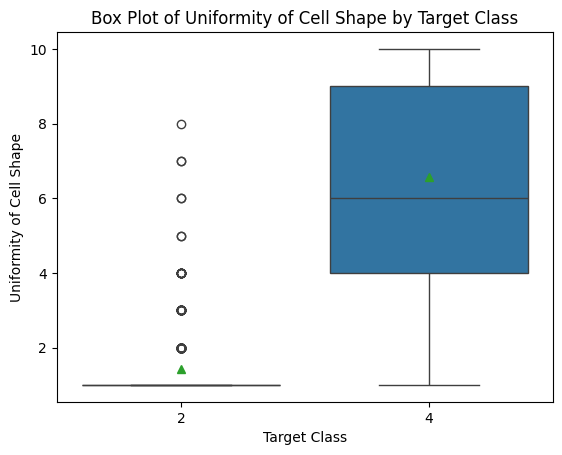

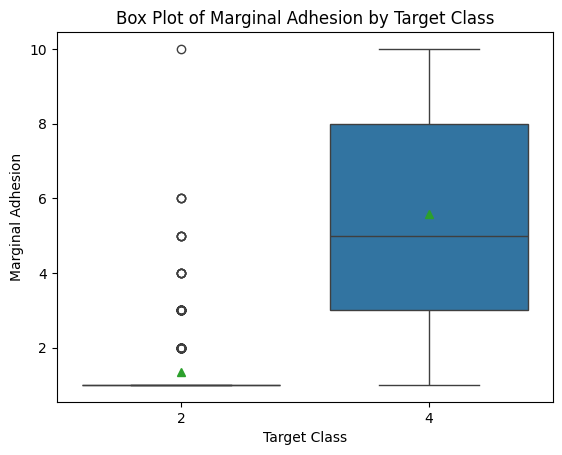

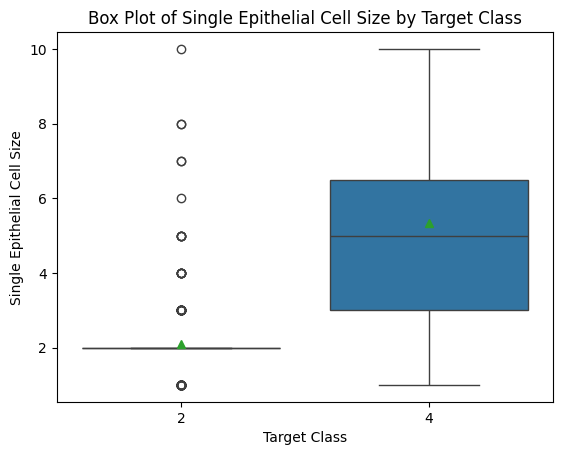

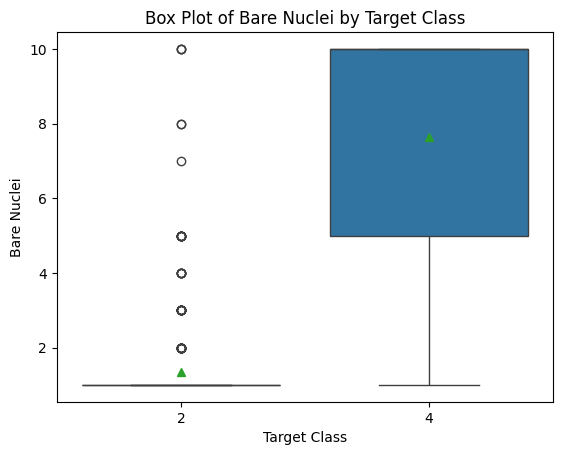

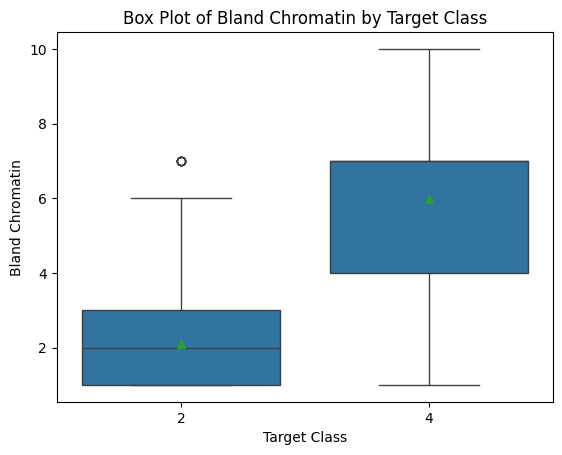

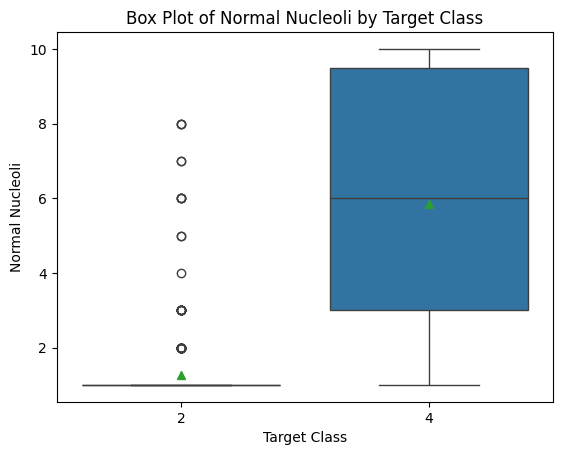

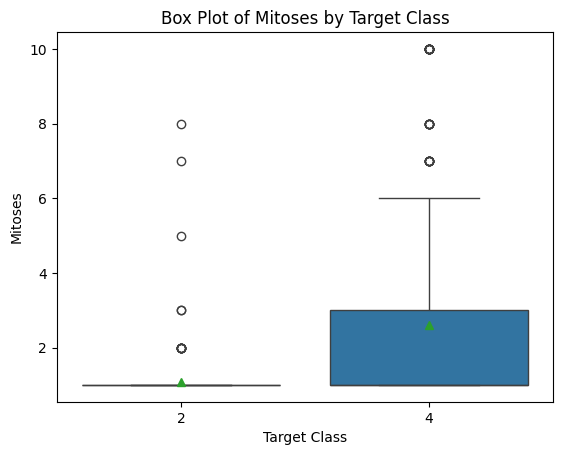

In [ ]:
features = df.columns.tolist()  # Get all feature names
for feature in features:
  if feature != 'Class':  # Skip the target variable
    sns.boxplot(
        x = "Class",
        y = feature,
        showmeans=True,
        data=df
    )
    plt.xlabel('Target Class')
    plt.ylabel(feature)  # Set feature name as y-axis label
    plt.title(f'Box Plot of {feature} by Target Class')
    plt.show()

In [ ]:
X = df.drop('Class',axis='columns')
y = df.Class

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.12366418,  0.19790469, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [-0.30297227,  0.19790469,  2.23617957, ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         0.37054027, -0.34839971]])

Normalization (MinMax Normalization)

In [ ]:
transformer = Normalizer().fit(X)
transformer

Normalizer()

In [ ]:
X_normalized = transformer.transform(X)
X_normalized

array([[1.00000000e+00, 4.99987500e-06, 9.99975001e-07, ...,
        2.99992500e-06, 9.99975001e-07, 9.99975001e-07],
       [1.00000000e+00, 4.98531824e-06, 3.98825459e-06, ...,
        2.99119094e-06, 1.99412729e-06, 9.97063647e-07],
       [1.00000000e+00, 2.95442795e-06, 9.84809316e-07, ...,
        2.95442795e-06, 9.84809316e-07, 9.84809316e-07],
       ...,
       [1.00000000e+00, 5.62543597e-06, 1.12508719e-05, ...,
        9.00069755e-06, 1.12508719e-05, 2.25017439e-06],
       [1.00000000e+00, 4.45696853e-06, 8.91393705e-06, ...,
        1.11424213e-05, 6.68545279e-06, 1.11424213e-06],
       [1.00000000e+00, 4.45696853e-06, 8.91393705e-06, ...,
        1.11424213e-05, 4.45696853e-06, 1.11424213e-06]])

Spliting of data into Training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (546, 10)
X_test size:  (137, 10)
y_train size:  (546,)
y_test size:  (137,)


Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.978021978021978

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9416058394160584

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[92,  4],
       [ 4, 37]])

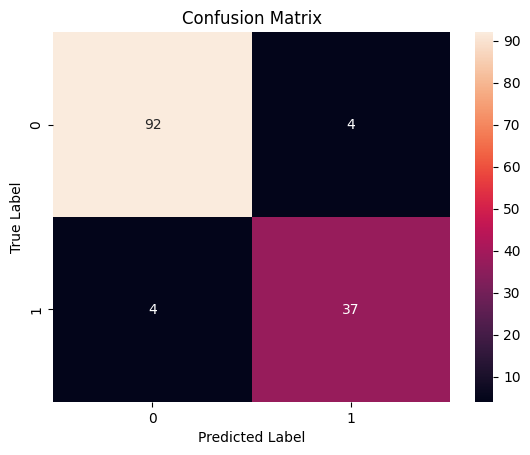

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

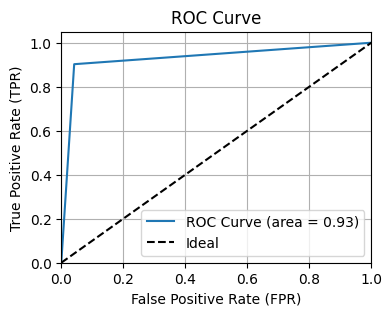

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        96
           1       0.90      0.90      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.94      0.94      0.94       137



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9945054945054945

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[90,  6],
       [ 3, 38]])

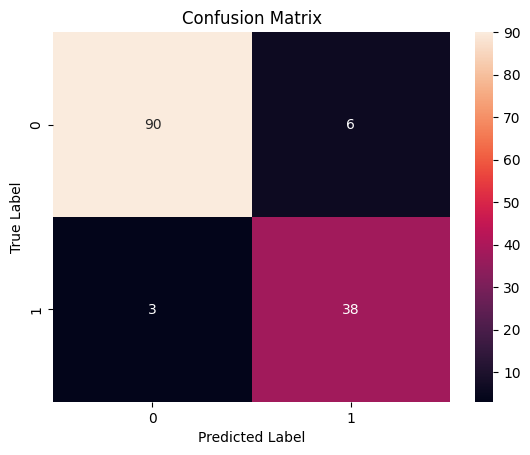

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

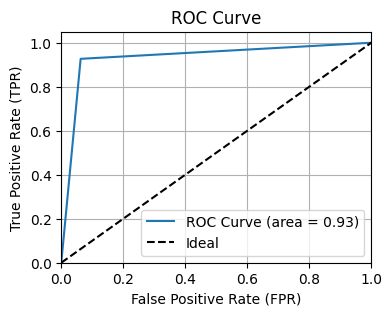

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        96
           1       0.86      0.93      0.89        41

    accuracy                           0.93       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.94      0.93      0.93       137



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9835164835164835

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[90,  6],
       [ 3, 38]])

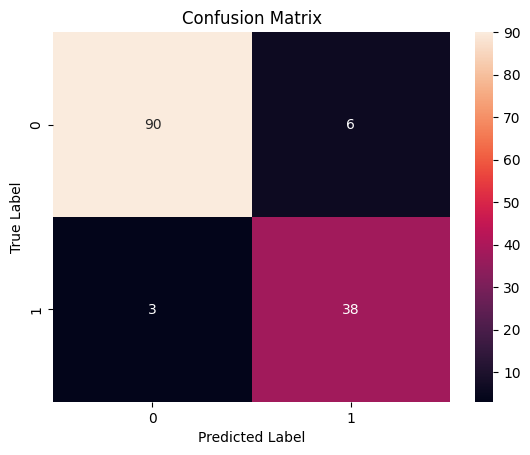

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

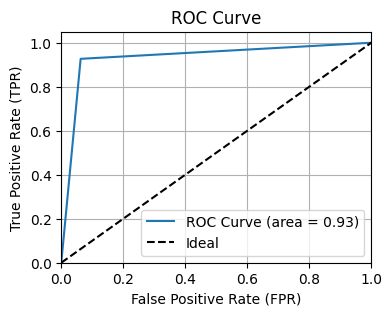

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        96
           1       0.86      0.93      0.89        41

    accuracy                           0.93       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.94      0.93      0.93       137



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.9816849816849816

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9416058394160584

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[91,  5],
       [ 3, 38]])

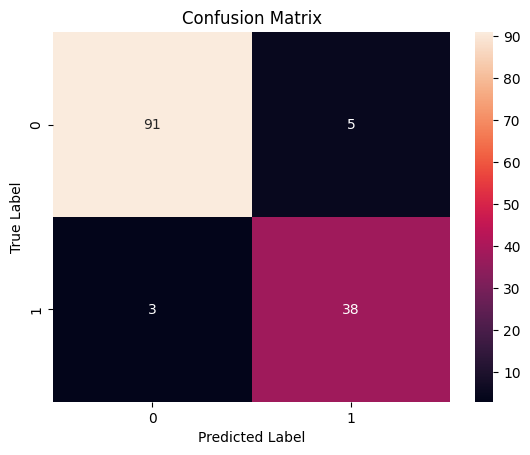

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

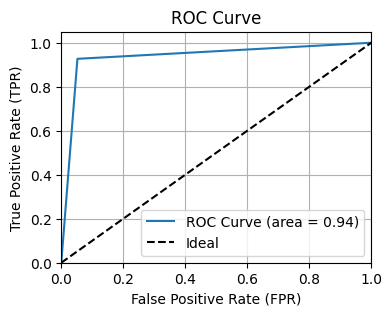

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.88      0.93      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.978021978021978

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[91,  5],
       [ 3, 38]])

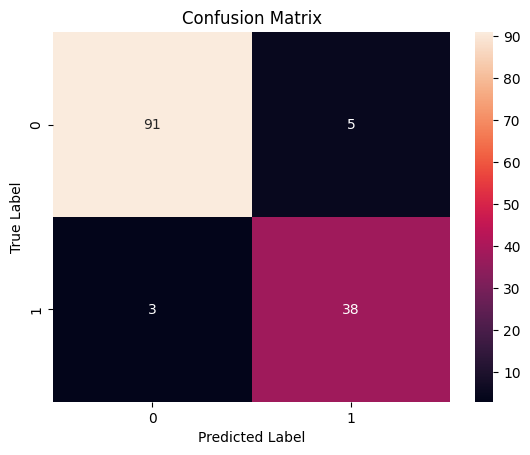

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

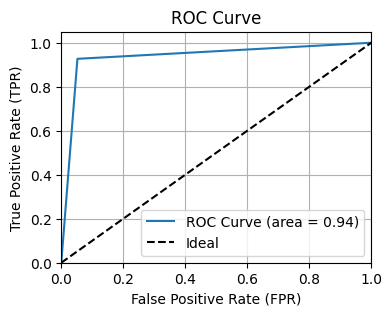

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.88      0.93      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



Correlation analysis

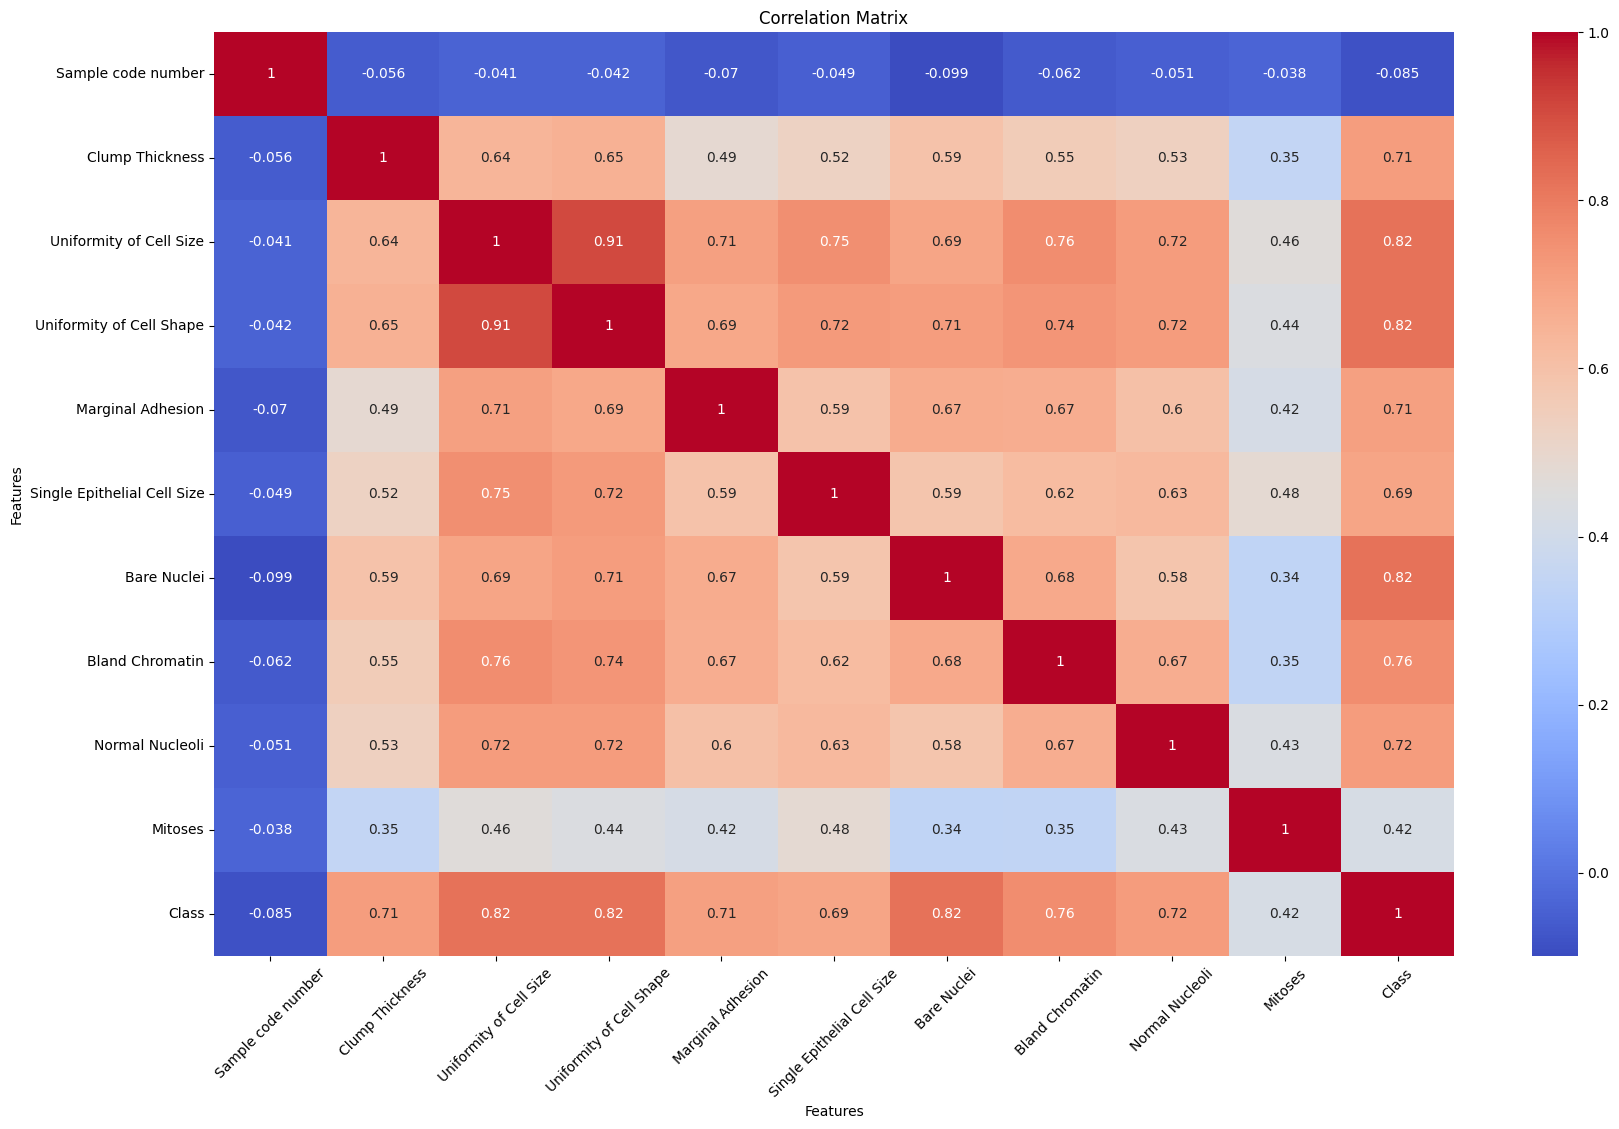

In [ ]:
correlation_matrix = df.corr()
# Create a new figure for the plot
plt.figure(figsize=(20, 12))

# Create a heatmap with annotations (values) and color gradient
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels for the x and y axes
plt.xlabel('Features')
plt.ylabel('Features')

# Add a title for the plot
plt.title('Correlation Matrix')

# Rotate x-axis labels for better readability with many features
plt.xticks(rotation=45)
plt.show()


Uniformity of cell size and Uniformity of cell shape is having postive correlation of 0.91

Feature Reduction

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop('Uniformity of Cell Shape',axis='columns')
df1

,Sample code number,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,2,1,3,1,1,2
1,1002945,5,4,5,7,10,3,2,1,2
2,1015425,3,1,1,2,2,3,1,1,2
3,1016277,6,8,1,3,4,3,7,1,2
4,1017023,4,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,3,2,1,1,1,2
679,841769,2,1,1,2,1,1,1,1,2
680,888820,5,10,3,7,3,8,10,2,4
681,897471,4,8,4,3,4,10,6,1,4


In [ ]:
X = df.drop('Class',axis='columns')
y = df.Class

Encoding

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.12366418,  0.19790469, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [-0.30297227,  0.19790469,  2.23617957, ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         0.37054027, -0.34839971]])

Normalization (MinMax Normalization)

In [ ]:
transformer = Normalizer().fit(X)
transformer

Normalizer()

In [ ]:
X_normalized = transformer.transform(X)
X_normalized

array([[1.00000000e+00, 4.99987500e-06, 9.99975001e-07, ...,
        2.99992500e-06, 9.99975001e-07, 9.99975001e-07],
       [1.00000000e+00, 4.98531824e-06, 3.98825459e-06, ...,
        2.99119094e-06, 1.99412729e-06, 9.97063647e-07],
       [1.00000000e+00, 2.95442795e-06, 9.84809316e-07, ...,
        2.95442795e-06, 9.84809316e-07, 9.84809316e-07],
       ...,
       [1.00000000e+00, 5.62543597e-06, 1.12508719e-05, ...,
        9.00069755e-06, 1.12508719e-05, 2.25017439e-06],
       [1.00000000e+00, 4.45696853e-06, 8.91393705e-06, ...,
        1.11424213e-05, 6.68545279e-06, 1.11424213e-06],
       [1.00000000e+00, 4.45696853e-06, 8.91393705e-06, ...,
        1.11424213e-05, 4.45696853e-06, 1.11424213e-06]])

Spliting of data into Training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (546, 10)
X_test size:  (137, 10)
y_train size:  (546,)
y_test size:  (137,)


Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.978021978021978

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9416058394160584

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[92,  4],
       [ 4, 37]])

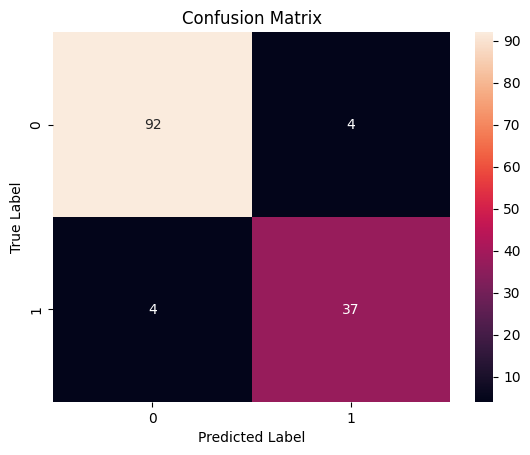

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

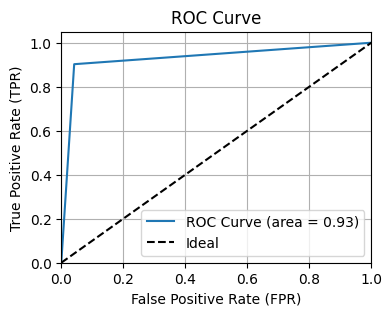

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        96
           1       0.90      0.90      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.94      0.94      0.94       137



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9963369963369964

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.927007299270073

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[90,  6],
       [ 4, 37]])

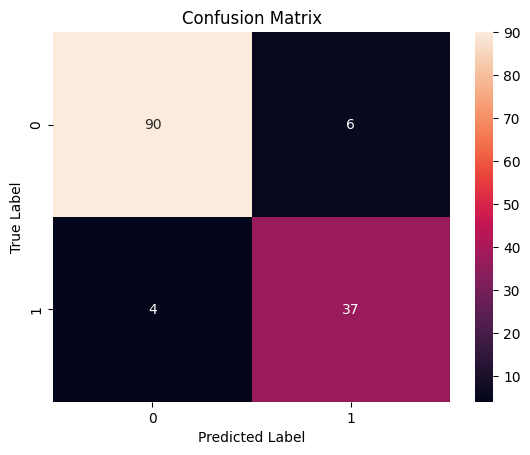

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

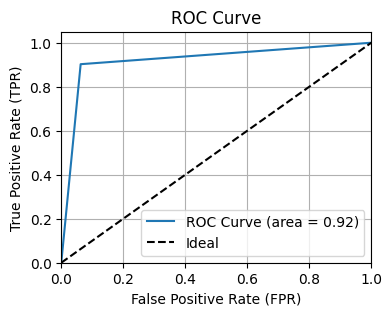

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        96
           1       0.86      0.90      0.88        41

    accuracy                           0.93       137
   macro avg       0.91      0.92      0.91       137
weighted avg       0.93      0.93      0.93       137



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9835164835164835

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[90,  6],
       [ 3, 38]])

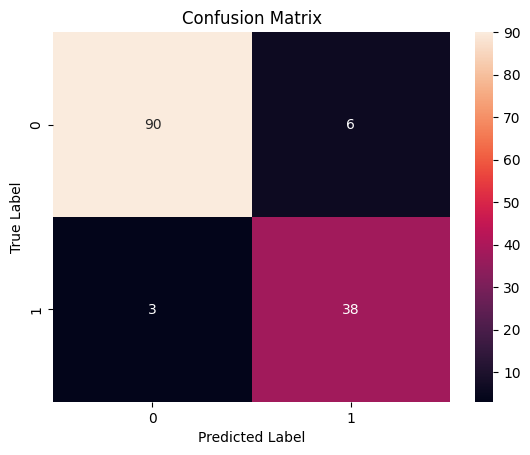

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

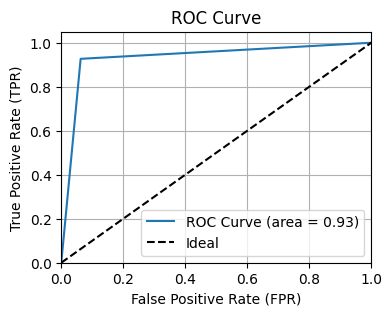

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        96
           1       0.86      0.93      0.89        41

    accuracy                           0.93       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.94      0.93      0.93       137



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.9816849816849816

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9416058394160584

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[91,  5],
       [ 3, 38]])

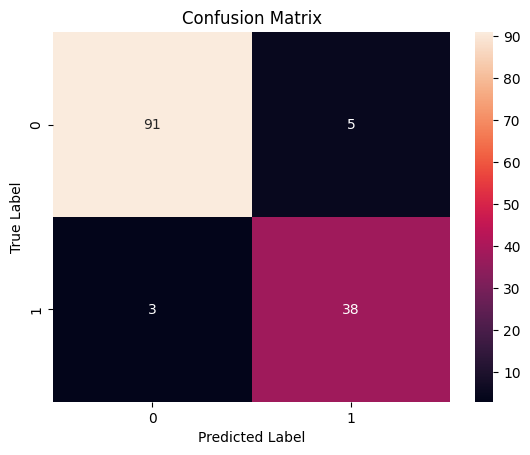

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

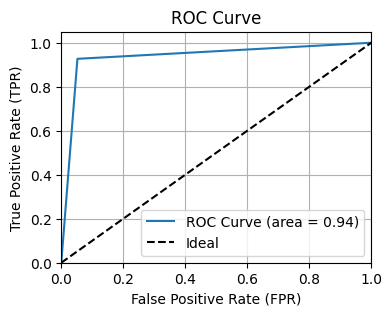

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.88      0.93      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.978021978021978

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[91,  5],
       [ 3, 38]])

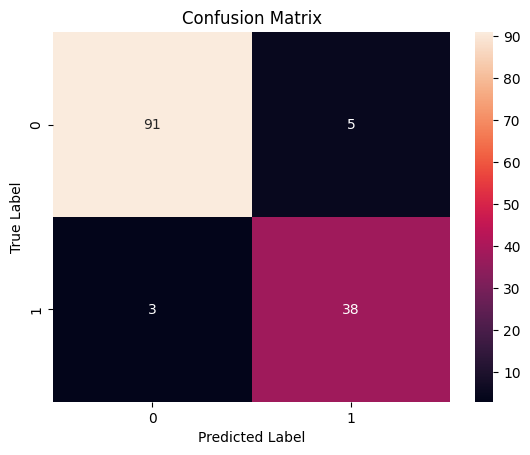

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

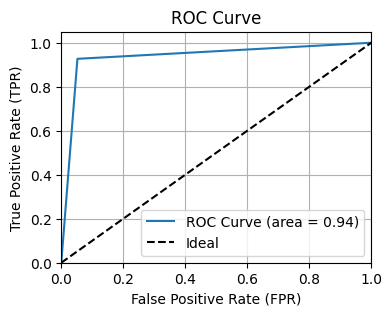

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.88      0.93      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



SMOTE Analysis

In [ ]:
df2 = df.copy()

In [ ]:
X2 = df2.drop('Class',axis='columns')
y2 = df.Class

Encoding

In [ ]:
encoder = LabelEncoder()
y2 = encoder.fit_transform(y2)

Scaling

In [ ]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_scaled

array([[-0.12366418,  0.19790469, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [-0.30297227,  0.19790469,  2.23617957, ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         0.37054027, -0.34839971]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X2_scaled,y2,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (546, 10)
X_test size:  (137, 10)
y_train size:  (546,)
y_test size:  (137,)


In [ ]:
y_train_series = pd.Series(y_train)

In [ ]:
print("Class distribution before SMOTE:")
print(y_train_series.value_counts())

Class distribution before SMOTE:
0    348
1    198
Name: count, dtype: int64


In [ ]:
# Create an SMOTE instance (adjust k_neighbors as needed)
smote = SMOTE(k_neighbors=5)  # Experiment with different k values

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train)

In [ ]:
y_resampled_series = pd.Series(y_resampled)

In [ ]:
print("Class distribution after SMOTE:")
print(y_resampled_series.value_counts())

Class distribution after SMOTE:
0    348
1    348
Name: count, dtype: int64


Performance of model after SMOTE analysis

Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.978021978021978

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9416058394160584

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[92,  4],
       [ 4, 37]])

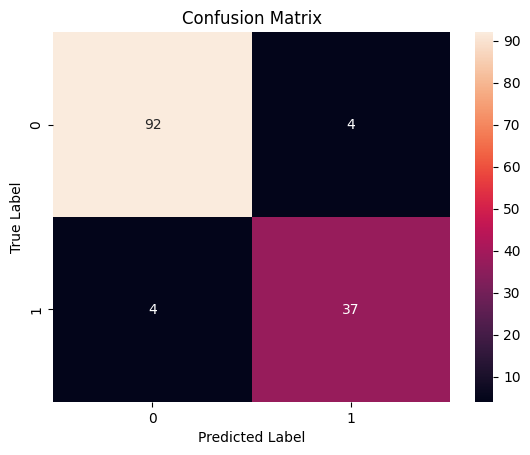

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

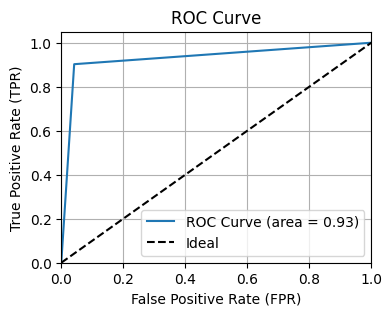

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Area Under ROC Curve

In [ ]:
roc_auc_score(y_test, lreg1.predict(X_test))
roc_auc_score(y_test, lreg1.decision_function(X_test))

0.9883130081300813

In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        96
           1       0.90      0.90      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.94      0.94      0.94       137



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9945054945054945

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9124087591240876

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[89,  7],
       [ 5, 36]])

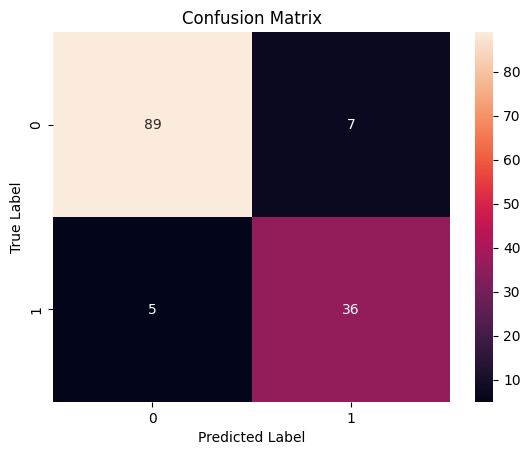

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

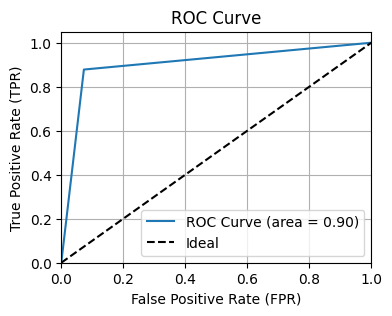

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        96
           1       0.84      0.88      0.86        41

    accuracy                           0.91       137
   macro avg       0.89      0.90      0.90       137
weighted avg       0.91      0.91      0.91       137



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9835164835164835

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[90,  6],
       [ 3, 38]])

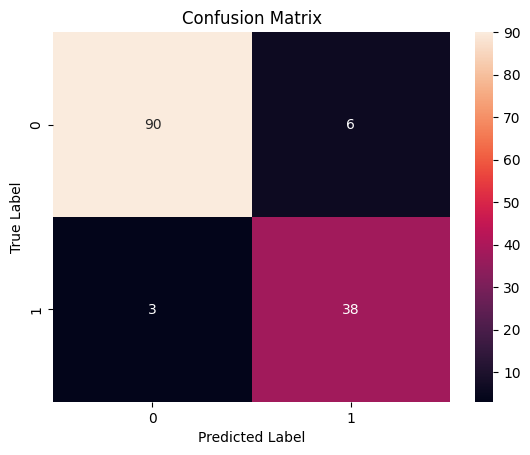

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

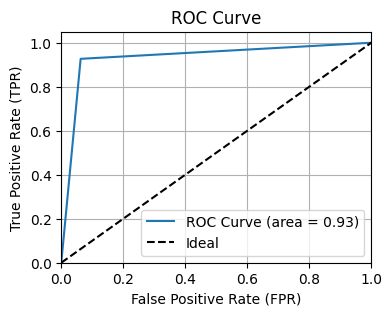

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        96
           1       0.86      0.93      0.89        41

    accuracy                           0.93       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.94      0.93      0.93       137



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.9816849816849816

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9416058394160584

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[91,  5],
       [ 3, 38]])

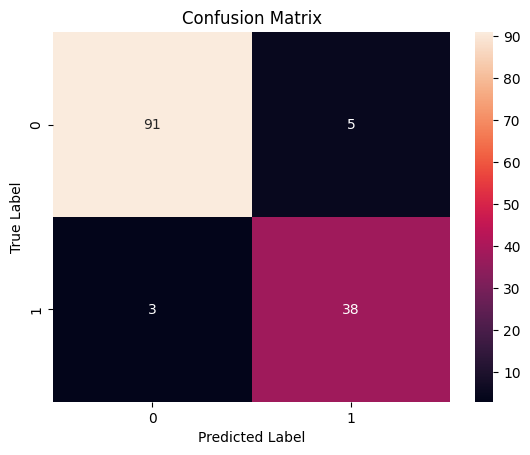

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

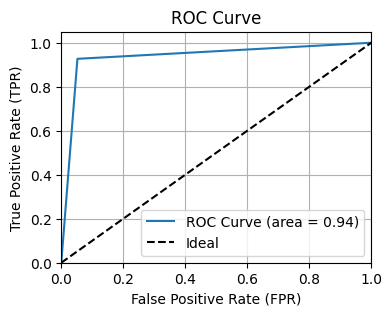

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.88      0.93      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.978021978021978

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.9343065693430657

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[91,  5],
       [ 3, 38]])

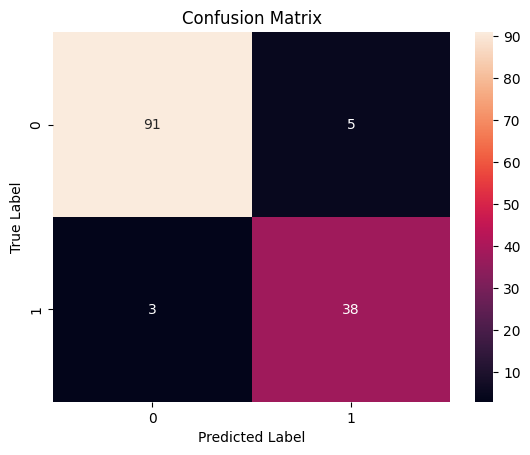

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

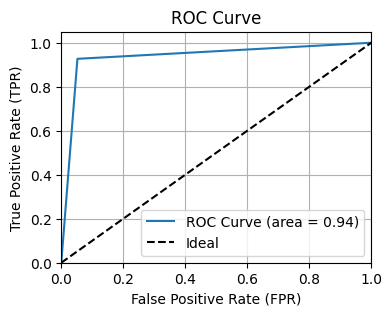

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.88      0.93      0.90        41

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137

